# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Anushka Tibrewal </font>

# Introduction
In this assignment we are introducing the AirQuality dataset, vizualizing the data, making the data clean by doing data preprocessing, and further doing successful implementation of the two models of linear regression ie Least Square and Least Mean Square. In the experiment section we are passing the model on our dataset and we can visualize with the help of the plots the actual value and the predicted value.

# Data

The AirQuality dataset consist of 9358 instances of AirQuality sensor devices.The data has been recorded for an year to check the air quality chemical sensor device responses. The data consist of 15 attributes which are as follows.<br>
Date (DD/MM/YYYY)<br>
Time (HH.MM.SS)<br>
True hour average concentration CO in mg/m^3 (reference analyzer)<br>
PT08.S1 (tin oxide) hour average sensor response (nominally CO targeted)<br>
True hour averag overall Non Metanic HydroCarbons concentration in mg/m^3 (reference analyzer)<br>
True hour averag Benzene concentration in mg/m^3 (reference analyzer)<br>
PT08.S2 (titania) hour average sensor response (nominally NMHC targeted)<br>
True hour average NOx concentration in ppb (reference analyzer)<br>
PT08.S3 (tungsten oxide) hour average sensor response (nominally NOx targeted)<br>
True hour average NO2 concentration in mg/m^3 (reference analyzer)<br>
PT08.S4 (tungsten oxide) hour average sensor response (nominally NO2 targeted)<br>
PT08.S5 (indium oxide) hour average sensor response (nominally O3 targeted)<br>
T Temperature in °C<br>
RH Relative Humidity<br>
AH Absolute Humidity<br>

# Importing and Plotting for understanding or analysis.

In [141]:
from IPython.display import Latex
from IPython.display import Math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
from plotly import tools


import plotly.plotly as mypy
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [143]:
init_notebook_mode(connected=True) 

In [144]:
df=pd.read_excel('AirQualityUCI.xlsx')

In [145]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


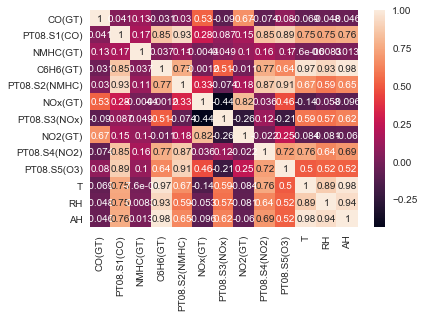

In [147]:
sns.heatmap(df.corr(), annot = True)

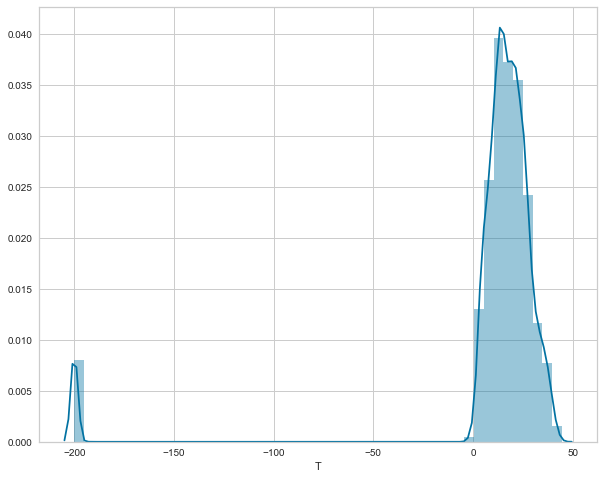

In [148]:
plt.figure(figsize = (10,8))
sns.distplot(df['T'])

From the above plot it is clear that the temperature has value -200 that is too huge and would show that the pollution content in the air is too high, so we will assign value 0 to -200.

# Preliminary Observation 

The dataset consist of total 15 columns, amongst which 12 columns are of significant importance, so while analyzing the dataset it can be observed that the columns date and time can be removed because it does not create any significant impacts. Moreover after visualizing the dataset we can also observe that the column C6H6(GT) can also be removed because C6H6(GT) have no sensor measure result, and hence it is not relevant with another attributes that have actual sensor measures, hence this column can also be dropped off and we are intotal left with 12 columns for the dataset. Moreover the missing values in the dataset is represented by '-200', we can also fill this missing value with either mean or median.

# Preprocessing of datasets

I will do some data preprocessing like Data Cleaning and Data Reduction.<br>
Data Reduction<br>
The dataset consists of 15 columns, removing a few columns because it has less significance, removing the date and time column, additionally all the values of gases has been taken as a result of sensor measure, so hence further removing C6H6(GT) because this value has not been taken from the sensor measures hence it will have the least significance.<br>
Data Cleaning<br>
There are some missing values in the dataset represented by 200 and -200, so filling these values with mean or median.

In [149]:
df = df.drop('Date', axis=1)
df = df.drop('Time', axis=1)
df = df.drop('C6H6(GT)', axis=1)

In [150]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [151]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


We can see that the minimum value is coming -200, because of this the mean is also coming negative, so firstly we need to replace this minimum value by 0

In [152]:
df[df < 0] = 0

In [153]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.000000,150,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2.0,1292.250000,112,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000,47.700000,0.725487
2,2.2,1402.000000,88,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000,53.975000,0.750239
3,2.2,1375.500000,80,948.250000,172.0,1092.000000,122.0,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,1.6,1272.250000,51,835.500000,131.0,1205.000000,116.0,1490.000000,1110.000000,11.150000,59.575001,0.788794
5,1.2,1197.000000,38,750.250000,89.0,1336.500000,96.0,1393.000000,949.250000,11.175000,59.175000,0.784772
6,1.2,1185.000000,31,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
7,1.0,1136.250000,31,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
8,0.9,1094.000000,24,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819
9,0.6,1009.750000,19,560.750000,0.0,1705.000000,0.0,1234.750000,501.250000,10.250000,60.200001,0.751657


In [154]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1.765545,1056.692672,21.373731,902.298983,203.636796,802.695353,93.232617,1399.186287,982.774554,17.600720,47.306631,0.985416
std,1.554264,301.232260,91.103489,318.681183,214.984126,299.341439,61.468588,441.442059,438.060087,9.356178,19.473998,0.442966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,921.000000,0.000000,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,0.000000,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,0.000000,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [155]:
for i in df.loc[df['CO(GT)']==0].index:
    df.loc[i, 'CO(GT)'] = df['CO(GT)'].mean()
for i in df.loc[df['PT08.S1(CO)']==0].index:
    df.loc[i, 'PT08.S1(CO)'] = df['PT08.S1(CO)'].mean()
for i in df.loc[df['NMHC(GT)']==0].index:
    df.loc[i, 'NMHC(GT)'] = df['NMHC(GT)'].mean()
for i in df.loc[df['PT08.S2(NMHC)']==0].index:
    df.loc[i, 'PT08.S2(NMHC)'] = df['PT08.S2(NMHC)'].mean()
for i in df.loc[df['NOx(GT)']==0].index:
    df.loc[i, 'NOx(GT)'] = df['NOx(GT)'].mean()
for i in df.loc[df['PT08.S3(NOx)']==0].index:
    df.loc[i, 'PT08.S3(NOx)'] = df['PT08.S3(NOx)'].mean()
for i in df.loc[df['NO2(GT)']==0].index:
    df.loc[i, 'NO2(GT)'] = df['NO2(GT)'].mean()
for i in df.loc[df['PT08.S4(NO2)']==0].index:
    df.loc[i, 'PT08.S4(NO2)'] = df['PT08.S4(NO2)'].mean()
for i in df.loc[df['PT08.S5(O3)']==0].index:
    df.loc[i, 'PT08.S5(O3)'] = df['PT08.S5(O3)'].mean()
for i in df.loc[df['T']==0].index:
    df.loc[i, 'T'] = df['T'].mean()
for i in df.loc[df['RH']==0].index:
    df.loc[i, 'RH'] = df['RH'].mean()
for i in df.loc[df['AH']==0].index:
    df.loc[i, 'AH'] = df['AH'].mean()

Replacing the missing values with the mean and median.

In [156]:
df

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.600000,1360.000000,150.000000,1045.500000,166.000000,1056.250000,113.000000,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2.000000,1292.250000,112.000000,954.750000,103.000000,1173.750000,92.000000,1558.750000,972.250000,13.300000,47.700000,0.725487
2,2.200000,1402.000000,88.000000,939.250000,131.000000,1140.000000,114.000000,1554.500000,1074.000000,11.900000,53.975000,0.750239
3,2.200000,1375.500000,80.000000,948.250000,172.000000,1092.000000,122.000000,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,1.600000,1272.250000,51.000000,835.500000,131.000000,1205.000000,116.000000,1490.000000,1110.000000,11.150000,59.575001,0.788794
5,1.200000,1197.000000,38.000000,750.250000,89.000000,1336.500000,96.000000,1393.000000,949.250000,11.175000,59.175000,0.784772
6,1.200000,1185.000000,31.000000,689.500000,62.000000,1461.750000,77.000000,1332.750000,732.500000,11.325000,56.775000,0.760312
7,1.000000,1136.250000,31.000000,672.000000,62.000000,1453.250000,76.000000,1332.750000,729.500000,10.675000,60.000000,0.770238
8,0.900000,1094.000000,24.000000,608.500000,45.000000,1579.000000,60.000000,1276.000000,619.500000,10.650000,59.674999,0.764819
9,0.600000,1009.750000,19.000000,560.750000,203.636796,1705.000000,93.232617,1234.750000,501.250000,10.250000,60.200001,0.751657


# Method

# Linear Model<br>
Linear model is the dot product between two vectors x and w.

$$
\begin{align*}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align*}
$$

### Least Squares<br>
The parameter that gives best fit is:

$$
w^* = \arg\min_w \sum_{i=1}^{N} \Big( f(x_i; w) - t_i \Big)^2
$$

Here the error function above mentioned needs to be minimized. Since the error function is quadratic we will get the minimum value of error function by taking it's derivative.

After taking the derivative with respect to *w* and setting it equal to 0 we get:
$$
\begin{align}
w &= \big(X^\top X\big)^{-1} X^\top 
\end{align}
$$

### Least Mean Squares(LMS)
In Least Squares method it is using all the available data in
one go but, but this can be very costly so hence we come up with least mean squares that follows the Online Learning process. In this we calculate the
value of weight at each iteration (for each datapoint) and based on calculated values in
previous step, it makes new estimation.


This gives the following update rule for each sample:

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

### Explanation of Codes
For the purpose of this assignment we have implemented two models of Linear Regression ie Least Square and Least Mean Square. The LinearModel class has two classes LinearRegress and LMS. The LinearRegress class is for Least Squares. This class has a constructor which is calling the constructor of the super class and will intialize the weight. The class further has two methods ie train and use, In the train method we are adding ones to the 2-D matrix and then calculating the weights. In the use method we are returning the dot product of the weight and the input data.<br>


The LMS class is for Least Mean Square. The LMS class, consists of three functions train, train_step and use. The use function for LMS class is similar the LinearRegress class. The train function is calling the train_step function to update the weights. The train_step takes one instance and the corresponding target value as an input. The following equation is used to update the weights in the train_step function.


The train function calls the train_step function for all the instances in the input data. Thus, the weight values are obtained in LMS.

\begin{align*}
  f(x;w) &= w^Tx = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align*}

### Implementation

### Super Classs Definition

In [157]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [158]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T

    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w

### Least Mean Squares

In [159]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
                self.train_step(x,t)
          
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        if len(x.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        
        h = self.w.T @ x
        h=h-t
        self.w =self.w - (self.alpha * h * x)
 
    
    
    
    
    # apply the current model to data X
    def use(self, X):
        
        if len(X.T.shape) != 2:
            x = np.insert(x,0,1).reshape(-1,1)

        x = self.add_ones(X).T
        y = self.w.T @ x
        
        return y.T
        
        

### Preliminary Test

In [160]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


### Usage Examples

In [161]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

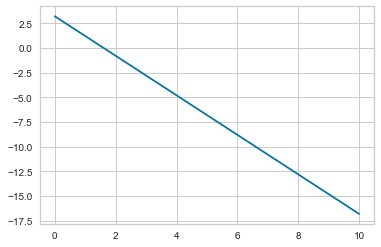

In [162]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

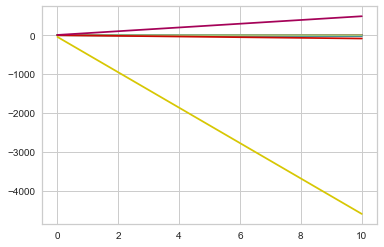

In [163]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

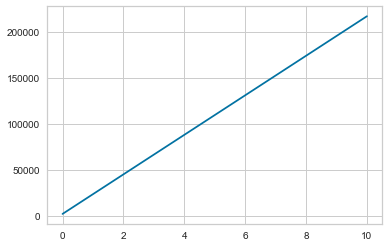

In [164]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

# Divide the data into training and test set

In [165]:
X= df.iloc[:,0:9].values
T= df.iloc[:,9:10].values

In [166]:
""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    Xtrain = np.zeros(shape=(1,X.shape[1]))
    Ttrain = np.zeros(shape=(1,T.shape[1]))

    Xtest = np.zeros(shape=(1,X.shape[1]))
    Ttest = np.zeros(shape=(1,T.shape[1]))
    
    
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [167]:
Xlst, Tlst = partition(pd.DataFrame(X), pd.DataFrame(T))

In [168]:
Xtrain, Xtest = [xx.values for xx in Xlst]
Ttrain, Ttest = [tt.values for tt in Tlst]

The above implemented Partition class is randomly splitting the datasets into 4 different training and
test sets. Out of them 'Xtrain' and 'Ttrain' conatins 80% of the total data and will be used to train the
model. And 'Xtest' and 'Ttest' contains 20% of data and will be used for testing the data.

### Least Squares

In [169]:
plt.figure(figsize = (10, 10))
ls = LinearRegress()
ls.train(Xtrain, Ttrain)
y = ls.use(Xtest)

<Figure size 720x720 with 0 Axes>

In [170]:
print(np.sqrt(np.mean((Ttest - y)**2)))

6.334158835734816


### Least Mean Squares

In [171]:
lms = LMS(0.000001)
lms.train_step(Xtrain[i],Ttrain[i])
q = lms.use(Xtest)

In [172]:
print(np.sqrt(np.mean((Ttest - q)**2)))

64.01669126628485


In [173]:
df.shape[0]

9357

### Description of code

Firstly we are creating an object of LinearRegress class, which is used to call its
function. The 'train' method called in the training datasets is passed (Xtrain,Ttrain).
It will calculate the weight which is best suited weight according to the data. Then we call the 'use' method in which we are passing our test dataset on which it is calculating target values based on the calculated weights of previous method and the predicted value will be compared with actual test values splitted.<br>
Secondly, we are creating LMS object (lms), with its help we are calling its 'train' method in which we
are passing our training datasets. Then, we are calling its 'use' function which is returning predicted
values, which can be compared with the test value to check the accuracy.

### Vizualization of Results

### Least Squares

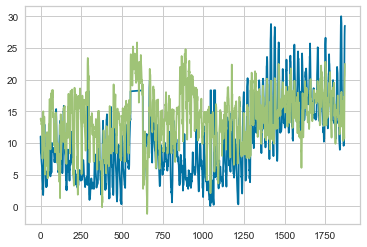

In [174]:
plt.plot(Ttest,'b')
plt.plot(y,'g')

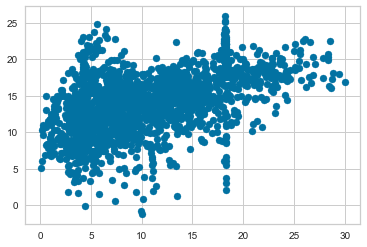

In [175]:
plt.scatter(Ttest,y)

The plot is between the actual value (Ttest) and the predicted value (y). The actual value (Ttest) is shown by blue colour in the graph and the predicted value (y) is shown by green colour in the graph. We can examine the difference between the actual and predicted value directly by visualizing the graph.

### Least Mean Squares

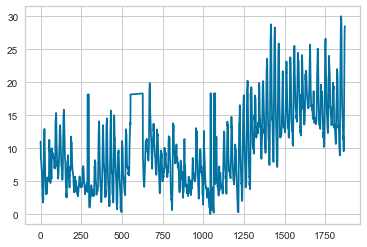

In [176]:
plt.plot(Ttest,'b')

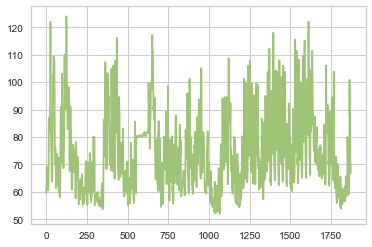

In [177]:
plt.plot(q,'g')

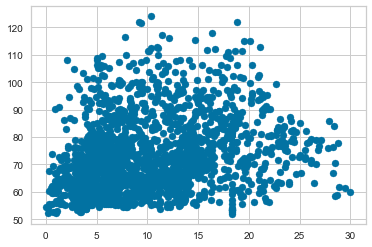

In [178]:
plt.scatter(Ttest,q)

For the lms we have used two graphs, the first graph is for the actual value and the second one is for the predicted value. The actual value Ttest is represented by blue colour and the predicted value q is represented by green colour. From the above two figures we can see and vizaulize the difference between the actual and predicted value significantly.

### Analysis and comparison of Algorithms

In Least Square we follow the batch learning method and in least mean square we follow the online learning method.In batch learning the system is trained using all the available data in one go while in online learning the data is recieved in a continuous flow. In online learning the data instances are fed sequentially and the parameters are updated accordingly. Both the algorithms are used to calculate the weight vectors which is dot product with our feature matrix and the desired output is obtained.<br>
After visualizing both the algorithms, we have made the plots between our actual target value and the predicted target value.<br>

We have calculated the root mean square error (RMSE) which is used to measure the differences between values (sample and population values) predicted by a model and the values actually observed.In the Least Square model we have got a rmse value of '6.334' which is showing that the predicted value of the model fits well to the actual value.
In the Least Squares method we can visualize that there is some difference between the actual and predicted values. And the same vizualization can be done from the graph.<br>
In the Least Mean Squares algorithm that there some significant difference between actual and predicted value. After comparing its accuracy with 'Least Squares', the error rate for 'Least Mean Squares' is higher than that for 'Least Square'.

# Extra Credit

### What is the most and least significant features for your data.

In [179]:
df.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.776408,0.255417,0.796169,0.772119,-0.619243,0.659640,0.546785,0.763858,0.005029,0.044174,0.029917
PT08.S1(CO),0.776408,1.000000,0.305522,0.892990,0.619651,-0.771284,0.570460,0.683009,0.899295,0.044940,0.114867,0.135545
NMHC(GT),0.255417,0.305522,1.000000,0.203810,0.004555,-0.090539,0.102682,0.197215,0.192923,-0.082503,-0.008458,-0.122896
PT08.S2(NMHC),0.796169,0.892990,0.203810,1.000000,0.604628,-0.796258,0.566536,0.777300,0.880604,0.237968,-0.090124,0.187055
NOx(GT),0.772119,0.619651,0.004555,0.604628,1.000000,-0.569187,0.763415,0.199923,0.693412,-0.244538,0.191262,-0.135773
PT08.S3(NOx),-0.619243,-0.771284,-0.090539,-0.796258,-0.569187,1.000000,-0.578895,-0.538017,-0.796237,-0.140168,-0.056526,-0.231807
NO2(GT),0.659640,0.570460,0.102682,0.566536,0.763415,-0.578895,1.000000,0.130550,0.639081,-0.180332,-0.081343,-0.307191
PT08.S4(NO2),0.546785,0.683009,0.197215,0.777300,0.199923,-0.538017,0.130550,1.000000,0.591213,0.556290,-0.031930,0.629708
PT08.S5(O3),0.763858,0.899295,0.192923,0.880604,0.693412,-0.796237,0.639081,0.591213,1.000000,-0.030835,0.125085,0.070864
T,0.005029,0.044940,-0.082503,0.237968,-0.244538,-0.140168,-0.180332,0.556290,-0.030835,1.000000,-0.581911,0.652402


/Users/anushkatibrewal/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



<Figure size 720x432 with 0 Axes>

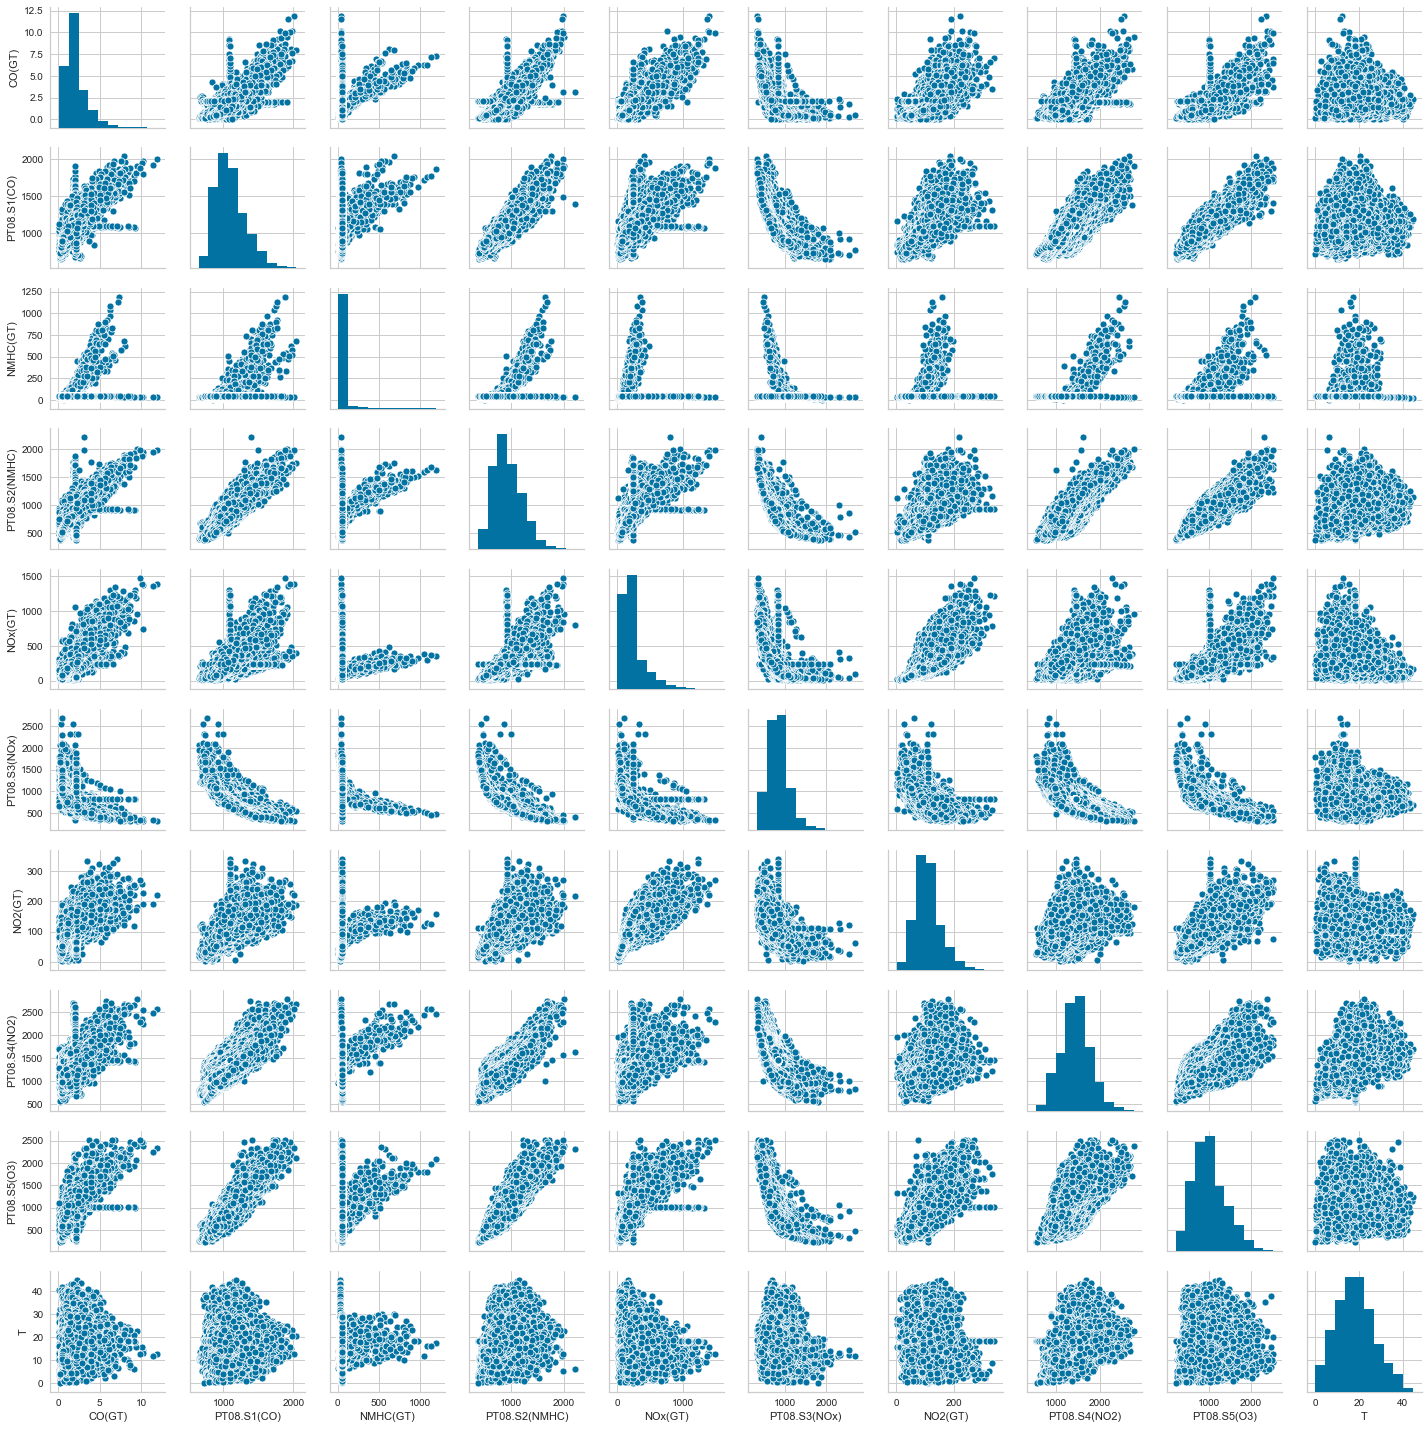

In [180]:
plt.figure(figsize = (10,6))
sns.pairplot(df[['CO(GT)','PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T']],size = 2)

PT08.S4(N02) is the most significant feature for the data. From the Correlation between the feature matrix and the target label we can see that the best input data with the target lable 'T' is PT08.S4(NO2) because it's value in the correlation table is very close to the positive value 1 that is 0.556290 and the same thing can be observed from the plot above that the best input data that gives a good linear fit to the model with the Target label 'T' is PTO8.S4(NO2).<br>
NMHC(GT) is the least significant feature for the data. From the Correlation between the feature matrix and the target label we can see that the worst input data with the target lable 'T' is NMHC(GT) because it's value in the correlation table is very close to the negative value 1 that is -0.082503 and the same thing can be observed from the plot above that the least significant input data that does not gives a linear fit to the model with the Target label 'T' is NMHC(GT).<br>

### What are the consequences if you remove those features from the model?

### Removing the most significant feature from the data.

### For Least Square.

In [181]:
X1= df.iloc[:,0:6].values
T1= df.iloc[:,9:10].values

In [182]:
Xlst1, Tlst1 = partition(pd.DataFrame(X1), pd.DataFrame(T1))

In [183]:
Xtrain1, Xtest1 = [xx.values for xx in Xlst1]
Ttrain1, Ttest1 = [tt.values for tt in Tlst1]

In [184]:
plt.figure(figsize = (10, 10))
ls = LinearRegress()
ls.train(Xtrain1, Ttrain1)
y1 = ls.use(Xtest1)

<Figure size 720x720 with 0 Axes>

In [185]:
print(np.sqrt(np.mean((Ttest1 - y1)**2)))

8.390497689960068


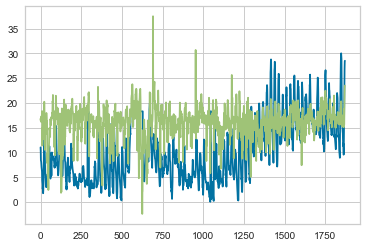

In [186]:
plt.plot(Ttest1,'b')
plt.plot(y1,'g')

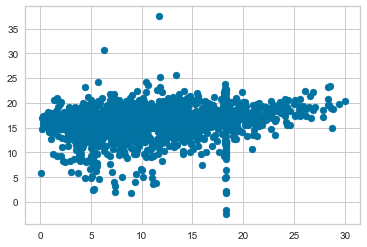

In [187]:
plt.scatter(Ttest1,y1)

### For Least Mean Square.

In [188]:
lms = LMS(0.00001)
lms.train_step(Xtrain1[i],Ttrain1[i])
q1 = lms.use(Xtest1)

In [189]:
print(np.sqrt(np.mean((Ttest1 - q1)**2)))

381.02139801163463


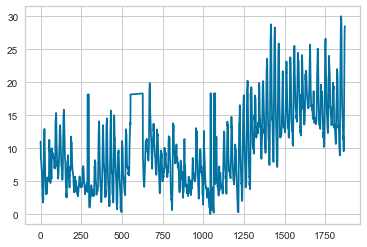

In [190]:
plt.plot(Ttest1,'b')

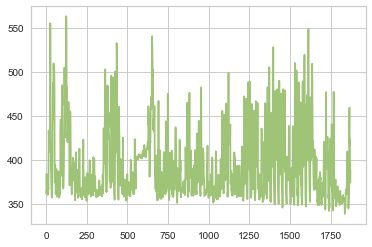

In [191]:
plt.plot(q1,'g')

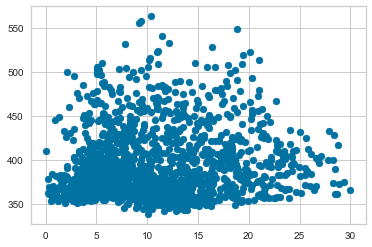

In [192]:
plt.scatter(Ttest1,q1)

### Residual Plots

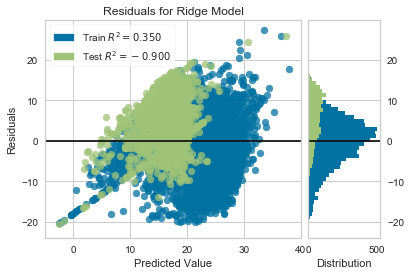

In [193]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X1, T1 = load_concrete()


# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(Xtrain1, Ttrain1)  # Fit the training data to the visualizer
visualizer.score(Xtest1, Ttest1)  # Evaluate the model on the test data
visualizer.poof() 

In the above implememtation we have removed the most dignificant feature from the matrix and have calculated the Least Square and Least Mean Square. We have also calculated the RMSE value for both the algorithms. WE can examine from the above that the there is significant change in the rmse value for both the algorithms for what we have calculated in our experiment section and the there is an increase in the rmse value, this means that after removing the most significant value from the dataset the accuracy of our algorithm is getting worse. In the above we have also produced the recidual plots.

### Removing the least significant feature from the data.

### For Least Square.

In [194]:
X2= df.iloc[:,[0,1,3,4,5,6,7,8]].values
T2= df.iloc[:,9:10].values

In [195]:
Xlst2, Tlst2 = partition(pd.DataFrame(X2), pd.DataFrame(T2))

In [196]:
Xtrain2, Xtest2 = [xx.values for xx in Xlst2]
Ttrain2, Ttest2 = [tt.values for tt in Tlst2]

In [197]:
plt.figure(figsize = (10, 10))
ls = LinearRegress()
ls.train(Xtrain2, Ttrain2)
y2 = ls.use(Xtest2)

<Figure size 720x720 with 0 Axes>

In [198]:
print(np.sqrt(np.mean((Ttest2 - y2)**2)))

6.304654239268912


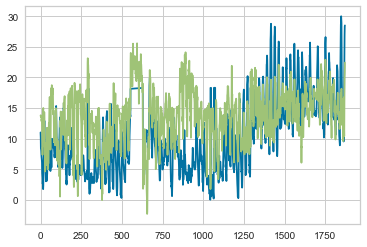

In [199]:
plt.plot(Ttest2,'b')
plt.plot(y2,'g')

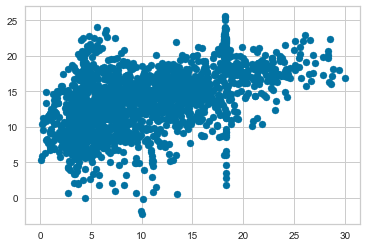

In [200]:
plt.scatter(Ttest2,y2)

In [201]:
lms = LMS(0.000001)
lms.train_step(Xtrain2[i],Ttrain2[i])
q2 = lms.use(Xtest2)

In [202]:
print(np.sqrt(np.mean((Ttest2 - q2)**2)))

63.96785525347709


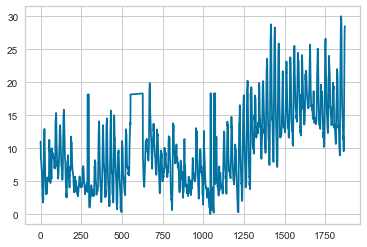

In [203]:
plt.plot(Ttest2,'b')

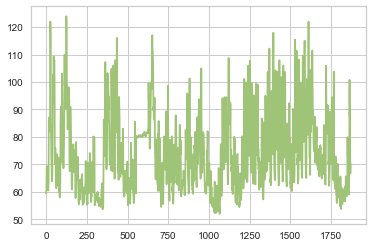

In [204]:
plt.plot(q2,'g')

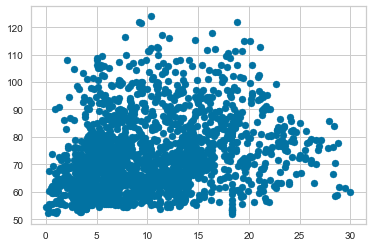

In [205]:
plt.scatter(Ttest2,q2)

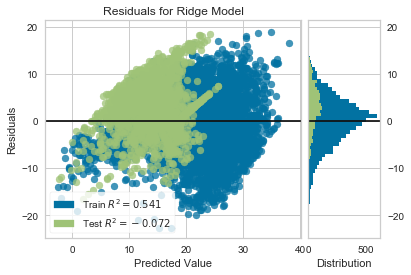

In [206]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X2, T2 = load_concrete()


# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(Xtrain2, Ttrain2)  # Fit the training data to the visualizer
visualizer.score(Xtest2, Ttest2)  # Evaluate the model on the test data
visualizer.poof() 

In the above implememtation we have removed the least dignificant feature from the matrix and have calculated the Least Square and Least Mean Square. We have also calculated the RMSE value for both the algorithms. WE can examine from the above that the there is no significant change in the rmse value for both the algorithms for what we have calculated in our experiment section and the there is the value rmse is almost same, this means that after removing the least significant value from the dataset the accuracy of our algorithm is not getting affected. In the above we have also produced the residual plots.

# Conclusions

In this assignment I have worked with two models of Linear Regression ie Least Square and Least Mean Square. Working on the implementation of the code and getting the Preliminary test passed was very challenging and helped me gain alot of insights. Further I got to know how to vizualize the model in an efficient manner and also it helped me learn that data preprocessing and vizualization is an important factor before applying the datasets into the model. 

# References

1)Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996.<br>
2)S. De Vito, E. Massera, M. Piga, L. Martinotto, G. Di Francia, On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario, Sensors and Actuators B: Chemical, Volume 129, Issue 2, 22 February 2008, Pages 750-757, ISSN 0925-4005.<br>
3)“Notebook on Nbviewer.” Jupyter Notebook Viewer, https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb.<br>